# 케라스의 SimpleRNN과 LSTM 이해하기

## 1. 임의의 입력 생성하기

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

In [2]:
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))

(4, 5)


In [3]:
# 2D 텐서가 아닌 3D 텐서로 변경하기 위해 배치 크기 1을 추가
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


## 2. SimpleRNN 이해하기

In [4]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False)와 동일.
hidden_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[-0.26641476  0.8515086  -0.99958086]], shape: (1, 3)


In [5]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))

hidden states : [[[ 0.98435336 -0.19148126  0.94092643]
  [ 0.9788815  -0.85532004  0.20413932]
  [ 0.97204894 -0.98450077  0.57987857]
  [ 0.997664    0.2875985  -0.18402597]]], shape: (1, 4, 3)


In [6]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden states : [[[ 0.9963447   0.99982005 -0.7818855 ]
  [ 0.99961215  0.99793386  0.55596226]
  [ 0.999877    0.99170154  0.05131026]
  [ 0.9989755   0.984277   -0.32400107]]], shape: (1, 4, 3)
last hidden state : [[ 0.9989755   0.984277   -0.32400107]], shape: (1, 3)


In [7]:
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden state : [[-0.9025065  0.9422961  0.771301 ]], shape: (1, 3)
last hidden state : [[-0.9025065  0.9422961  0.771301 ]], shape: (1, 3)


## 3. LSTM 이해하기

In [8]:
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[-0.23889287  0.08576467  0.16462293]], shape: (1, 3)
last hidden state : [[-0.23889287  0.08576467  0.16462293]], shape: (1, 3)
last cell state : [[-0.43787417  0.42150232  0.29483795]], shape: (1, 3)


In [9]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[ 0.52312315  0.00295922 -0.01026142]
  [ 0.30443856  0.03336659 -0.03548237]
  [ 0.443729    0.05776221 -0.13761473]
  [-0.08839761  0.0966601  -0.19984044]]], shape: (1, 4, 3)
last hidden state : [[-0.08839761  0.0966601  -0.19984044]], shape: (1, 3)
last cell state : [[-0.16978128  0.6676459  -0.75665766]], shape: (1, 3)


## 4. Bidirecitonal(LSTM) 이해하기
- forward_h와 backward_h는 각각 정방향 LSTM의 마지막 시점의 은닉 상태와 역방향 LSTM의 첫번째 시점의 은닉 상태값입니다.

    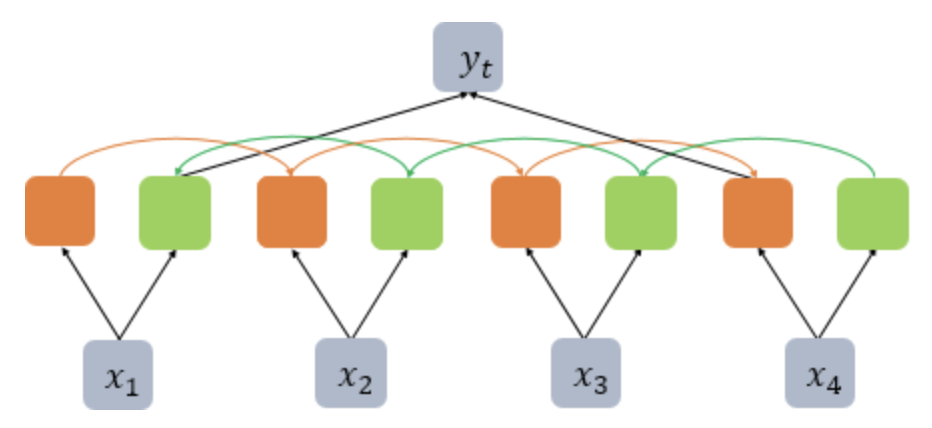
- return_sequences를 True로 할 경우, 역방향 LSTM의 첫번째 시점의 은닉 상태는 정방향 LSTM의 첫번째 시점의 은닉 상태와 연결됩니다.

    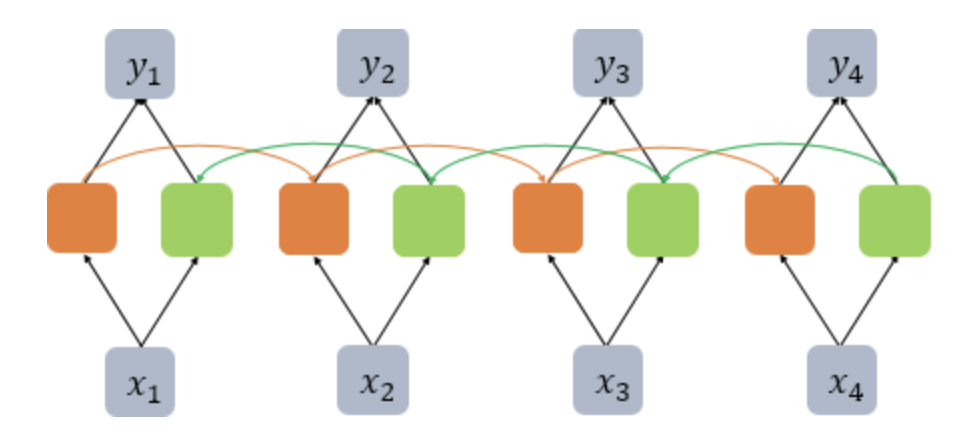

In [10]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

In [11]:
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[0.63031393 0.63031393 0.63031393 0.7038734  0.7038734  0.7038734 ]], shape: (1, 6)
forward state : [[0.63031393 0.63031393 0.63031393]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


In [12]:
bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

In [13]:
# 역방향 LSTM의 첫번째 시점의 은닉 상태는 더 이상 정방향 LSTM의 마지막 시점의 은닉 상태와 연결되는 것이 아니라 
# 정방향 LSTM의 첫번째 시점의 은닉 상태와 연결됩니다.
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.5511133  0.5511133  0.5511133  0.58863586 0.58863586 0.58863586]
  [0.59115756 0.59115756 0.59115756 0.3951699  0.3951699  0.3951699 ]
  [0.63031393 0.63031393 0.63031393 0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.63031393 0.63031393 0.63031393]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)
